In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv('city_day.csv')

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [6]:
df  = df.fillna(df.mean())

In [7]:
df['BTX'] = df['Benzene']+df['Toluene']+df['Xylene']
df.drop(['Benzene','Toluene','Xylene'],axis=1,inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d') # date parse
df['year'] = df['Date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df['month'] = [d.strftime('%b') for d in df.Date]

# SO2

## Cities in Ascending Order

In [9]:
S=df.groupby('City')['SO2'].max().sort_values(ascending=False).reset_index()

In [10]:
S.head()

,City,SO2
0,Mumbai,193.86
1,Lucknow,187.02
2,Ahmedabad,186.08
3,Jorapokhar,158.25
4,Bengaluru,92.66


In [11]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["City","SO2"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[S['City'].head(10),S['SO2'].head(10)],
               fill = dict(color = ['lightgreen', 'white']),
               align = ['center']))

trace1 = go.Bar(x=S['City'].head(10),
                y=S['SO2'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=830,
    height=420,
    autosize=False,
    title='TOP 10 Cities with Max SO2',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

## SO2 Yearly

In [12]:
SO2=df.groupby('year')['SO2'].sum().reset_index().sort_values(by='year',ascending=False)
NO2=df.groupby('year')['NO2'].sum().reset_index().sort_values(by='year',ascending=False)
BTX=df.groupby('year')['BTX'].sum().reset_index().sort_values(by='year',ascending=False)
CO=df.groupby('year')['CO'].sum().reset_index().sort_values(by='year',ascending=False)
PM=df.groupby('year')['PM2.5'].sum().reset_index().sort_values(by='year',ascending=False)
O=df.groupby('year')['O3'].sum().reset_index().sort_values(by='year',ascending=False)

In [13]:
SO2.iplot(kind='line',mode='lines+markers',x='year',y='SO2',title='AMOUNT OF SO2 IN DIFFERENT YEARS ')

## SO2 Monthly

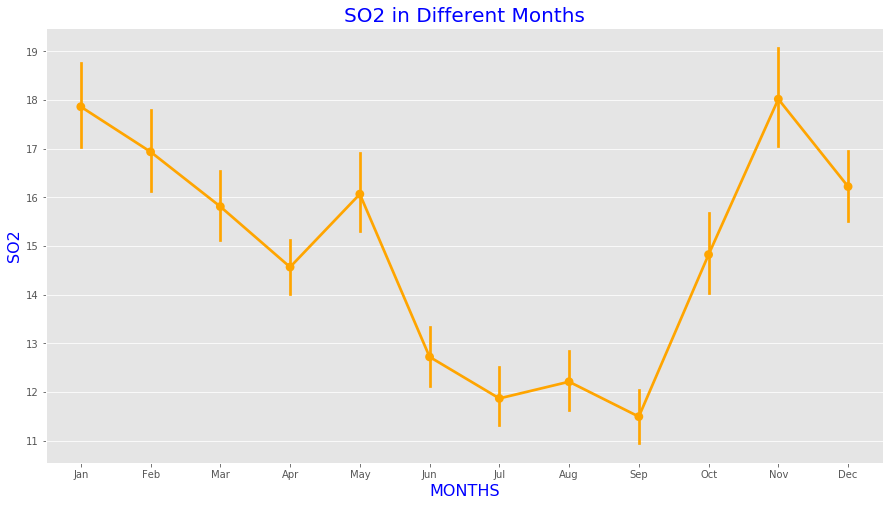

In [14]:
plt.subplots(figsize =(15,8))
sns.pointplot(x='month', y='SO2', data=df,color='Orange')
plt.xlabel('MONTHS',fontsize = 16,color='blue')
plt.ylabel('SO2',fontsize = 16,color='blue')
plt.title('SO2 in Different Months',fontsize = 20,color='blue')
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\SO2_monthly')

# NO2

## Now we can find the max NO2 level in different years

In [15]:
N=df.groupby('City')['NO2'].max().sort_values(ascending=False).reset_index()
N.head()

,City,NO2
0,Gurugram,362.21
1,Ahmedabad,292.02
2,Patna,266.46
3,Amritsar,237.27
4,Delhi,162.50


In [16]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["City","NO2"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[N['City'].head(10),N['NO2'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center']))

trace1 = go.Bar(x=N['City'].head(10),
                y=N['NO2'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkblue'),opacity=0.60)
layout = dict(
    width=830,
    height=430,
    autosize=False,
    title='TOP 10 Cities with Max NO2',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

## NO2 Yearly

In [17]:
NO2.iplot(kind='line',mode='lines+markers',x='year',y='NO2',title='AMOUNT OF NO2 IN DIFFERENT YEARS ', color='blue')

## Monthly

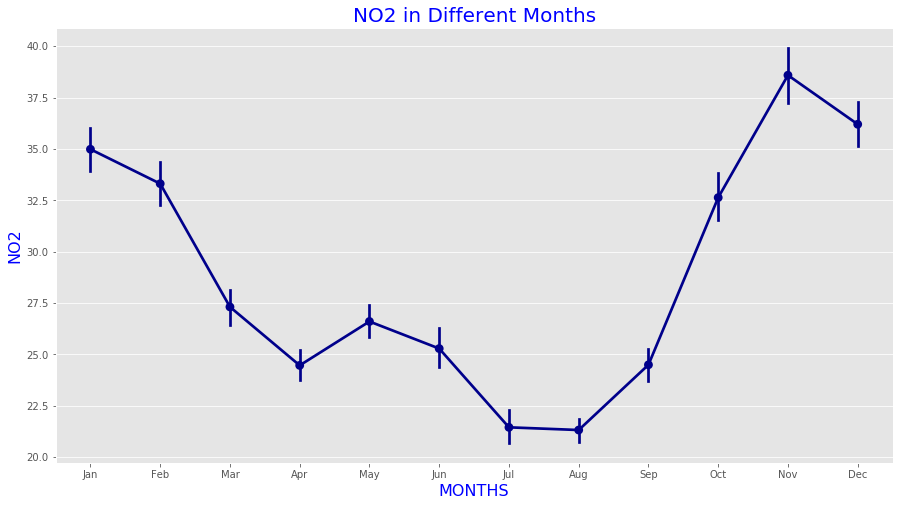

In [18]:
plt.subplots(figsize =(15,8))
sns.pointplot(x='month', y='NO2', data=df,color='darkblue')
plt.xlabel('MONTHS',fontsize = 16,color='blue')
plt.ylabel('NO2',fontsize = 16,color='blue')
plt.title('NO2 in Different Months',fontsize = 20,color='blue')
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\NO2_monthly')

# CO

In [19]:
C=df.groupby('City')['CO'].max().sort_values(ascending=False).reset_index()
C.head()

,City,CO
0,Ahmedabad,175.81
1,Bengaluru,48.07
2,Gurugram,39.80
3,Lucknow,32.22
4,Delhi,30.44


In [20]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["City","CO"],
                fill = dict(color = 'red'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[C['City'].head(10),C['CO'].head(10)],
               fill = dict(color = ['lightsalmon', 'white']),
               align = ['center']))

trace1 = go.Bar(x=C['City'].head(10),
                y=C['CO'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='fuchsia'),opacity=0.60)
layout = dict(
    width=830,
    height=490,
    autosize=False,
    title='TOP 10 Cities with Max CO',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

## CO Yearly

In [21]:
CO.iplot(kind='line',mode='lines+markers',x='year',y='CO',title='AMOUNT OF CO IN DIFFERENT YEARS ',color='green')

## Monthly

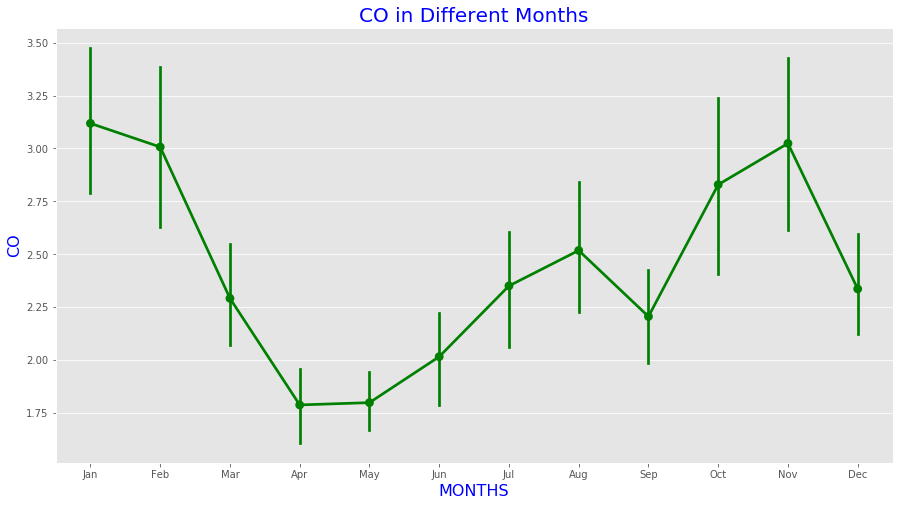

In [22]:
plt.subplots(figsize =(15,8))
sns.pointplot(x='month', y='CO', data=df,color='green')
plt.xlabel('MONTHS',fontsize = 16,color='blue')
plt.ylabel('CO',fontsize = 16,color='blue')
plt.title('CO in Different Months',fontsize = 20,color='blue')
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\CO_monthly')

# PM 2.5

In [23]:
P=df.groupby('City')['PM2.5'].max().sort_values(ascending=False).reset_index()
P.head()

,City,PM2.5
0,Gurugram,949.99
1,Shillong,917.77
2,Guwahati,916.67
3,Amritsar,868.66
4,Lucknow,742.67


In [24]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["City","PM2.5"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[P['City'].head(10),P['PM2.5'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center']))

trace1 = go.Bar(x=P['City'].head(10),
                y=P['PM2.5'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='deeppink'),opacity=0.60)
layout = dict(
    width=830,
    height=430,
    autosize=False,
    title='TOP 10 Cities with Max PM2.5',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Yearly

In [25]:
PM.iplot(kind='line',mode='lines+markers',x='year',y='PM2.5',title='AMOUNT OF PM2.5 IN DIFFERENT YEARS ',color='magenta')

# Monthly

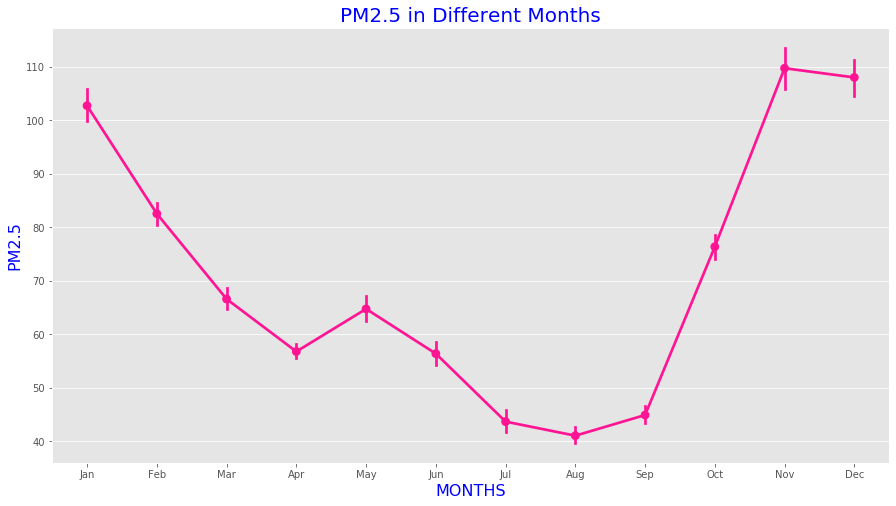

In [26]:
plt.subplots(figsize =(15,8))
sns.pointplot(x='month', y='PM2.5', data=df,color='deeppink')
plt.xlabel('MONTHS',fontsize = 16,color='blue')
plt.ylabel('PM2.5',fontsize = 16,color='blue')
plt.title('PM2.5 in Different Months',fontsize = 20,color='blue')
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\PM2.5_monthly.png')

# BTX

In [27]:
B=df.groupby('City')['BTX'].max().sort_values(ascending=False).reset_index()
B.head()

,City,BTX
0,Shillong,912.855895
1,Ahmedabad,489.945895
2,Bengaluru,442.435895
3,Lucknow,400.335895
4,Chennai,397.375895


In [28]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["City","BTX"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[B['City'].head(10),B['BTX'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center']))

trace1 = go.Bar(x=B['City'].head(10),
                y=B['BTX'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='midnightblue'),opacity=0.60)
layout = dict(
    width=830,
    height=430,
    autosize=False,
    title='TOP 10 Cities with Max BTX',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [29]:
BTX.iplot(kind='line',mode='lines+markers',x='year',y='BTX',title='AMOUNT OF BTX IN DIFFERENT YEARS ',color='red')

# Monthly

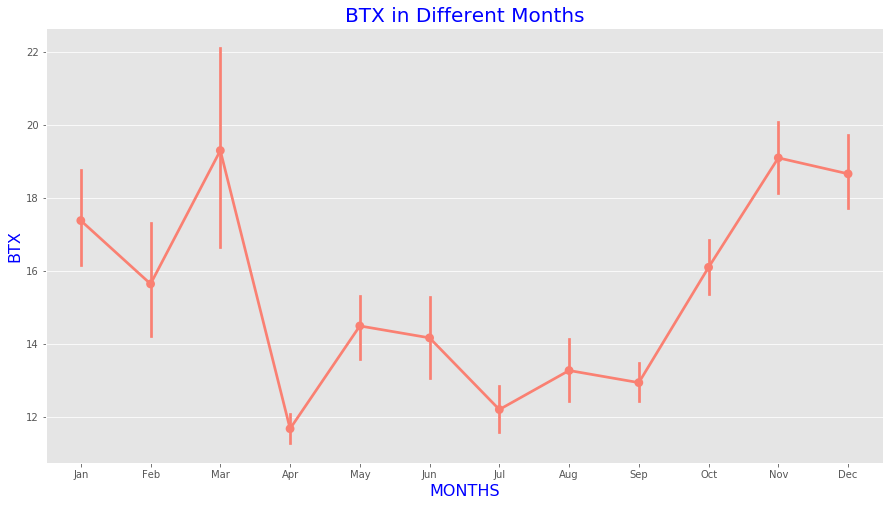

In [30]:
plt.subplots(figsize =(15,8))
sns.pointplot(x='month', y='BTX', data=df,color='salmon')
plt.xlabel('MONTHS',fontsize = 16,color='blue')
plt.ylabel('BTX',fontsize = 16,color='blue')
plt.title('BTX in Different Months',fontsize = 20,color='blue')
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\BTX_monthly.png')

In [31]:
from plotly.tools import make_subplots
trace1=go.Scatter(x=SO2['year'], y=SO2['SO2'], mode='lines+markers', name='NO2')
trace2=go.Scatter(x=NO2['year'], y=NO2['NO2'], mode='lines+markers', name='NO2')
trace3=go.Scatter(x=CO['year'], y=CO['CO'], mode='lines+markers', name='CO')
trace4=go.Scatter(x=PM['year'], y=PM['PM2.5'], mode='lines+markers', name='PM2.5')
fig = plotly.tools.make_subplots(rows=2, cols=2,print_grid=False,
                          subplot_titles=('SO2 in diff. years','NO2 in diff. years','CO in diff. years',
                                          'PM2.5 in diff. years'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig['layout'].update(height=550, width=850,title='AIR Pollutants In different Years',showlegend=False)
iplot(fig)

C:\Users\hp\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## In One Graph

In [32]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=SO2['year'], y=SO2['SO2'], mode='lines+markers', name='SO2',line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=NO2['year'], y=NO2['NO2'], mode='lines+markers', name='NO2',line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=BTX['year'], y=BTX['BTX'], mode='lines+markers', name='BTX',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=CO['year'], y=CO['CO'], mode='lines+markers', name='CO',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=PM['year'], y=PM['PM2.5'], mode='lines+markers', name='PM2.5',line=dict(color='Magenta', width=2)))
fig.add_trace(go.Scatter(x=O['year'], y=O['O3'], mode='lines+markers', name='Ozone',line=dict(color='royalblue', width=2)))
fig.update_layout(title='AIR POLLUTANTS PARTICLES IN DIFFERENT YEARS', xaxis_tickfont_size=14,yaxis=dict(title='TOTAL AMOUNT IN YEARS'))
fig.show()

# Let's analyze For 5 Major cities of air pollution.

In [33]:
cities = ['Ahmedabad','Delhi','Bengaluru','Kolkata','Hyderabad']

filtered_city_day = df[df['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


In [34]:
df_Ahmedabad = df[df['City']== 'Ahmedabad']
df_Bengaluru = df[df['City']== 'Bengaluru']
df_Delhi     = df[df['City']== 'Delhi']
df_Hyderabad = df[df['City']== 'Hyderabad']
df_Kolkata   = df[df['City']== 'Kolkata']

# Let's Check The AQI Distributions of these 5 cities

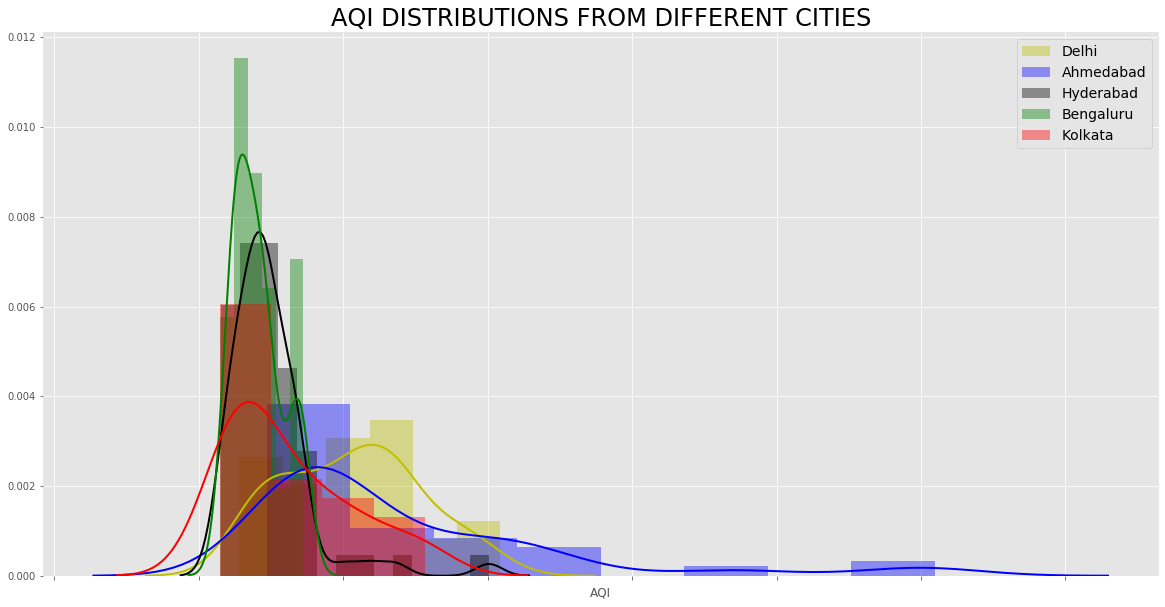

In [35]:
fig,ax=plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})
sns.distplot(df_Delhi['AQI'].iloc[::30], color="y",label = 'Delhi')
sns.distplot(df_Ahmedabad['AQI'].iloc[::30], color="b",label = 'Ahmedabad')
sns.distplot(df_Hyderabad['AQI'].iloc[::30], color="black",label = 'Hyderabad')
sns.distplot(df_Bengaluru['AQI'].iloc[::30], color="g",label = 'Bengaluru')
sns.distplot(df_Kolkata['AQI'].iloc  [::30], color="r",label = 'Kolkata')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15
ax.set_title('AQI DISTRIBUTIONS FROM DIFFERENT CITIES')
ax.legend(fontsize = 14);
plt.savefig('C:\\Users\\hp\\Desktop\\Plots\\AQI_Distributions.png')

# Lets compare among the three cities with the air pollutants particles in the year 2019

In [36]:
df_Bengaluru_2019=df_Bengaluru[df_Bengaluru['Date']>='2019-01-01']
df_Ahmedabad_2019=df_Ahmedabad[df_Ahmedabad['Date']>='2019-01-01']
df_Delhi_2019=df_Delhi[df_Delhi['Date']>='2019-01-01']
df_Kolkata_2019=df_Kolkata[df_Kolkata['Date']>='2019-01-01']
df_Hyderabad_2019=df_Hyderabad[df_Hyderabad['Date']>='2019-01-01']

In [37]:
x = df_Ahmedabad_2019
y = df_Bengaluru_2019
z = df_Hyderabad_2019

data = [go.Scatterpolar(
  r = [x['SO2'].values[0],x['NO2'].values[0],x['CO'].values[0],x['BTX'].values[0],x['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself', opacity = 0.8,
  name = "Ahmedabad"),
        
    go.Scatterpolar(
  r = [y['SO2'].values[0],y['NO2'].values[0],y['CO'].values[0],y['BTX'].values[0],y['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself',subplot = "polar2",
    name = "Bengaluru"),
       
    go.Scatterpolar(
  r = [z['SO2'].values[0],z['NO2'].values[0],z['CO'].values[0],z['BTX'].values[0],z['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself',subplot = "polar3",
    name = "Hyderbad")]
layout = go.Layout(title = "Comparison Between Ahmedabad,Bengaluru,Hyderabad in the year 2019",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 120]),
                   domain = dict(x = [0, 0.27],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 60]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 70]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [38]:
df_Bengaluru_2020=df_Bengaluru[df_Bengaluru['Date']>='2020-01-01']
df_Ahmedabad_2020=df_Ahmedabad[df_Ahmedabad['Date']>='2020-01-01']
df_Delhi_2020=df_Delhi[df_Delhi['Date']>='2020-01-01']
df_Kolkata_2020=df_Kolkata[df_Kolkata['Date']>='2020-01-01']
df_Hyderabad_2020=df_Hyderabad[df_Hyderabad['Date']>='2020-01-01']

In [39]:
x = df_Ahmedabad_2020
y = df_Bengaluru_2020
z = df_Hyderabad_2020

data = [go.Scatterpolar(
  r = [x['SO2'].values[0],x['NO2'].values[0],x['CO'].values[0],x['BTX'].values[0],x['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself', opacity = 0.8,
  name = "Ahmedabad"),
        
    go.Scatterpolar(
  r = [y['SO2'].values[0],y['NO2'].values[0],y['CO'].values[0],y['BTX'].values[0],y['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself',subplot = "polar2",
    name = "Bengaluru"),
       
    go.Scatterpolar(
  r = [z['SO2'].values[0],z['NO2'].values[0],z['CO'].values[0],z['BTX'].values[0],z['PM2.5'].values[0]],
  theta = ['SO2','NO2','CO','BTX','PM2.5'],
  fill = 'toself',subplot = "polar3",
    name = "Hyderbad")]
layout = go.Layout(title = "Comparison Between Ahmedabad,Bengaluru,Hyderabad in the year 2020",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 85]),
                   domain = dict(x = [0, 0.27],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 45]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 45]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#  Comparison of Air Pollutants before and after Lockdown

# In Delhi

In [40]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['SO2'], mode='lines', name='SO2',line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['NO2'], mode='lines', name='NO2',line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['BTX'], mode='lines', name='BTX',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['CO'], mode='lines', name='CO',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['PM2.5'], mode='lines', name='PM2.5',line=dict(color='Magenta', width=2)))
fig.add_trace(go.Scatter(x=df_Delhi_2020['Date'], y=df_Delhi_2020['O3'], mode='lines', name='Ozone',line=dict(color='royalblue', width=2)))
fig.update_layout(title='AIR POLLUTANTS PARTICLES ON 2020 DELHI', xaxis_tickfont_size=14,yaxis=dict(title='AIR POLLUTANTS'))
fig.show()

# In Kolkata

In [41]:
df_Kolkata.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,year,month
18357,Kolkata,2020-04-27,10.67,36.11,3.90,8.20,12.12,12.23,0.32,5.52,33.34,44.0,Good,7.42,2020,Apr
18358,Kolkata,2020-04-28,7.71,19.98,3.95,9.15,13.15,12.33,0.34,5.21,29.82,45.0,Good,8.09,2020,Apr
18359,Kolkata,2020-04-29,16.66,31.00,4.25,10.52,14.83,12.57,0.36,6.04,35.37,51.0,Satisfactory,9.99,2020,Apr
18360,Kolkata,2020-04-30,13.88,29.30,3.87,9.11,13.02,12.71,0.31,7.42,38.95,54.0,Satisfactory,7.38,2020,Apr
18361,Kolkata,2020-05-01,14.68,32.84,3.79,8.11,11.95,13.20,0.33,5.20,25.61,69.0,Satisfactory,6.62,2020,May


In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['SO2'], mode='lines', name='SO2',line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['NO2'], mode='lines', name='NO2',line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['BTX'], mode='lines', name='BTX',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['CO'], mode='lines', name='CO',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['PM2.5'], mode='lines', name='PM2.5',line=dict(color='Magenta', width=2)))
fig.add_trace(go.Scatter(x=df_Kolkata_2020['Date'], y=df_Kolkata_2020['O3'], mode='lines', name='Ozone',line=dict(color='royalblue', width=2)))
fig.update_layout(title='AIR POLLUTANTS PARTICLES ON 2020 Kolkata', xaxis_tickfont_size=14,yaxis=dict(title='AIR POLLUTANTS'))
fig.show()

# In Bengaluru

In [43]:
df_Bengaluru_2020.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,year,month
5993,Bengaluru,2020-04-27,19.25,50.33,3.17,11.69,14.32,9.21,0.76,5.55,33.06,59.0,Satisfactory,5.485895,2020,Apr
5994,Bengaluru,2020-04-28,20.74,55.81,2.71,11.24,13.01,10.71,0.79,5.86,33.90,71.0,Satisfactory,5.025895,2020,Apr
5995,Bengaluru,2020-04-29,13.68,39.31,2.68,12.02,13.47,10.72,0.74,5.73,30.77,62.0,Satisfactory,4.735895,2020,Apr
5996,Bengaluru,2020-04-30,20.30,54.56,4.21,15.27,17.17,8.07,0.75,5.45,32.26,61.0,Satisfactory,4.875895,2020,Apr
5997,Bengaluru,2020-05-01,25.43,84.95,2.81,13.00,15.70,8.10,0.66,5.36,30.60,75.0,Satisfactory,4.045895,2020,May


In [44]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['SO2'], mode='lines', name='SO2',line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['NO2'], mode='lines', name='NO2',line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['BTX'], mode='lines', name='BTX',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['CO'], mode='lines', name='CO',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['PM2.5'], mode='lines', name='PM2.5',line=dict(color='Magenta', width=2)))
fig.add_trace(go.Scatter(x=df_Bengaluru_2020['Date'], y=df_Bengaluru_2020['O3'], mode='lines', name='Ozone',line=dict(color='royalblue', width=2)))
fig.update_layout(title='AIR POLLUTANTS PARTICLES ON 2020 Bengaluru', xaxis_tickfont_size=14,yaxis=dict(title='AIR POLLUTANTS'))
fig.show()

# Compare AQI Buckets of Before Lockdown vs After Lockdown

In [51]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [52]:
AQI_beforeLockdown.head()

City,Ahmedabad,Bengaluru,Delhi,Hyderabad,Kolkata
Date,,,,,
2020-01-01,216.0,82.0,492.0,82.0,298.0
2020-01-02,162.0,81.0,485.0,64.0,267.0
2020-01-03,220.0,85.0,426.0,64.0,201.0
2020-01-04,254.0,95.0,366.0,87.0,91.0
2020-01-05,255.0,118.0,354.0,112.0,182.0


In [53]:
AQI_afterLockdown.head()

City,Ahmedabad,Bengaluru,Delhi,Hyderabad,Kolkata
Date,,,,,
2020-03-26,216.0,61.0,93.0,59.0,95.0
2020-03-27,193.0,67.0,76.0,65.0,106.0
2020-03-28,160.0,70.0,51.0,70.0,100.0
2020-03-29,125.0,66.0,64.0,75.0,101.0
2020-03-30,140.0,72.0,74.0,72.0,107.0


In [54]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    377.037700
Bengaluru     96.023529
Delhi        246.305882
Hyderabad     94.435294
Kolkata      184.094118
dtype: float64
City
Ahmedabad    127.972973
Bengaluru     68.513514
Delhi        107.378378
Hyderabad     65.675676
Kolkata       75.648649
dtype: float64


In [82]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [83]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()

"Ahmedabad's AQI levels"

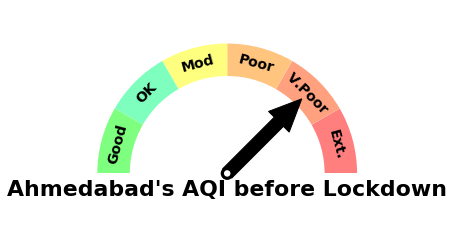

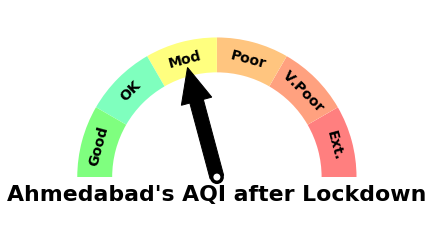

In [88]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=5, title="Ahmedabad's AQI before Lockdown") 

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=3, title="Ahmedabad's AQI after Lockdown") 

"Delhi's AQI levels"

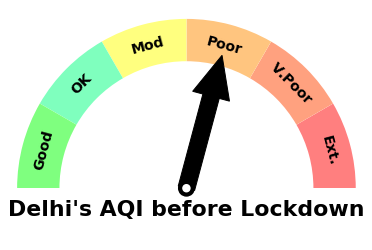

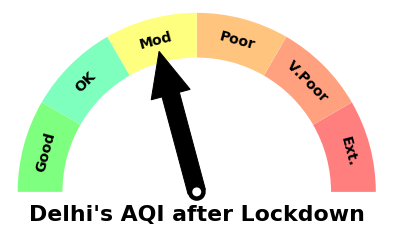

In [89]:
display("Delhi's AQI levels")

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=3, title="Delhi's AQI after Lockdown") 

"Bengaluru's AQI levels"

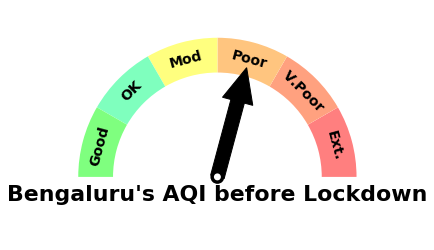

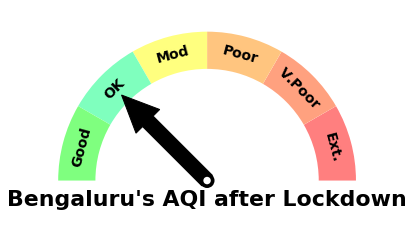

In [91]:
display("Bengaluru's AQI levels")

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=4, title="Bengaluru's AQI before Lockdown") 

gauge(labels=['Good','OK','Mod','Poor','V.Poor','Ext.'], \
      colors=['lime','springgreen','yellow','darkorange','orangered','red'], arrow=2, title="Bengaluru's AQI after Lockdown") 